In [2]:
import pandas as pd

check2=pd.read_csv(r'cleaned_data2.csv')


📊 Polynomial Regression Model Performance:
🔹 Train R² Score: 0.9988 | Test R² Score: 0.9988
🔹 Train MSE: 0.0012 | Test MSE: 0.0012
🔹 Train RMSE: 0.0346 | Test RMSE: 0.0344
🔹 Train MAE: 0.0207 | Test MAE: 0.0207


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


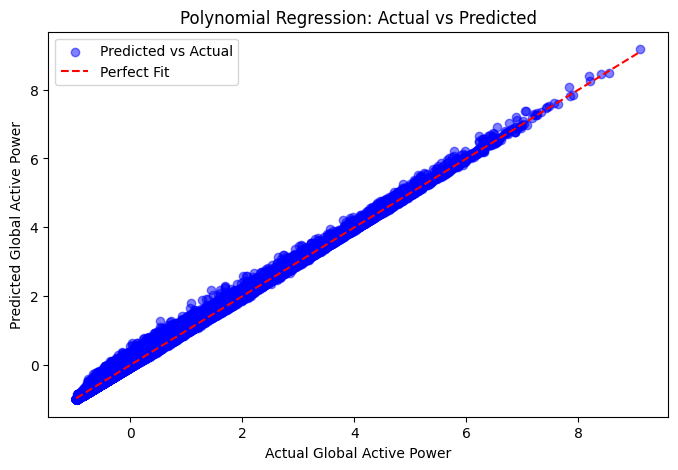

In [4]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Define Features (X) and Target Variable (y)
X = check2.drop(columns=["Global_active_power"])  # Features
y = check2["Global_active_power"]  # Target

# ✅ Split data into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Apply Polynomial Transformation (No scaling needed)
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 🔹 Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# 🔹 Predict on Train and Test sets
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# 🔹 Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# ✅ Print Model Evaluation Metrics
print("\n📊 Polynomial Regression Model Performance:")
print(f"🔹 Train R² Score: {train_r2:.4f} | Test R² Score: {test_r2:.4f}")
print(f"🔹 Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
print(f"🔹 Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"🔹 Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")

# ✅ Visualization: Actual vs Predicted (Test Data)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show()
